<a href="https://colab.research.google.com/github/4nands/L20251022/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - acc: 0.2903 - loss: 2.0801 - val_acc: 0.8228 - val_loss: 1.0305
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - acc: 0.6964 - loss: 1.0660 - val_acc: 0.8792 - val_loss: 0.6108
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.7943 - loss: 0.7360 - val_acc: 0.8996 - val_loss: 0.4482
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8416 - loss: 0.5791 - val_acc: 0.9049 - val_loss: 0.3779
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8595 - loss: 0.4997 - val_acc: 0.9110 - val_loss: 0.3339


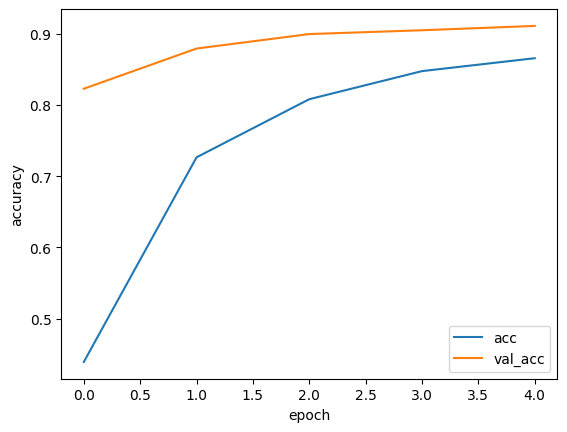

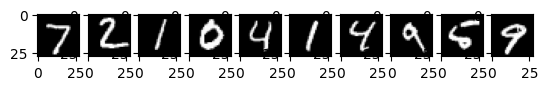

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[7 2 1 0 4 1 4 9 6 9]


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((train_images.shape[0],784))
test_images = test_images.reshape((test_images.shape[0],784))

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(256,activation='sigmoid',input_shape=(784,)))
model.add(tf.keras.layers.Dense(128,activation='sigmoid'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),metrics=['acc'])

history = model.fit(train_images,train_labels,batch_size=500,epochs=5,validation_split=0.2)

plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(test_images[i].reshape((28,28)),'gray')
plt.show()

test_predictions = model.predict(test_images[0:10])
test_predictions = np.argmax(test_predictions,axis=1)
print(test_predictions)
